In [1]:
import pandas as pd
import numpy as np

In [2]:
# df = pd.read_csv('training_clean_and_complete.csv')

In [3]:
# df.columns

In [4]:
# # Let's drop the first column
# df = df.drop(df.columns[0], axis=1)

In [5]:
# # Let's move our target variable to the end of the df
# col = df.pop("diabetes_mellitus")
# df.insert(143, col.name, col)

In [6]:
# # Let's rewrite our training dataset
# df.to_csv("training_final.csv", encoding='utf-8', index=True)

In [7]:
df = pd.read_csv('training_final.csv')

In [8]:
df.columns

Index(['Unnamed: 0', 'encounter_id', 'hospital_id', 'elective_surgery',
       'icu_id', 'readmission_status', 'apache_post_operative', 'arf_apache',
       'gcs_unable_apache', 'intubated_apache',
       ...
       'd1_hematocrit_min', 'd1_platelets_max', 'd1_platelets_min',
       'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max',
       'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min', 'diabetes_mellitus'],
      dtype='object', length=145)

In [9]:
# Let's drop the first column
df = df.drop(df.columns[0], axis=1)

In [10]:
df.head()

,encounter_id,hospital_id,elective_surgery,icu_id,readmission_status,apache_post_operative,arf_apache,gcs_unable_apache,intubated_apache,ventilated_apache,...,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,diabetes_mellitus
0,214826,118,0,92,0,0,0,0,0,0,...,36.1,557,487.0,4.2,3.8,145.0,145.0,23.3,12.7,1
1,246060,81,0,90,0,0,0,0,0,1,...,33.2,194,185.0,4.2,3.9,139.0,138.0,11.1,10.1,1
2,276985,118,0,93,0,0,0,0,0,0,...,25.9,198,43.0,5.0,3.5,139.0,138.0,9.0,8.0,0
3,262220,118,1,92,0,1,0,0,1,1,...,33.2,194,185.0,4.2,3.9,139.0,138.0,11.1,10.1,0
4,201746,33,0,91,0,0,0,0,0,0,...,44.2,159,159.0,3.9,3.7,137.0,137.0,10.9,10.9,0


## Create X (matrix of features) and y (target variable vector)

In [11]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Split data into train and test set

In [12]:
# We'll split using the 30/70 rule, that is 30% of data will be our test and 70% will be our training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

## Feature Scaling

In [13]:
# Chceck to make sure that the 60th column is the first numerical column -- it should be age
df.iloc[:, 60]

0         77
1         25
2         81
3         19
4         67
          ..
130151    50
130152    79
130153    73
130154    81
130155    35
Name: age, Length: 130156, dtype: int64

In [14]:
from sklearn import preprocessing

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Note that thte 60th column is a
X_train[:, 60:] = sc.fit_transform(X_train[:, 60:])
X_test[:, 60:] = sc.transform(X_test[:, 60:])

## Rebalance training dataset

In [16]:
# Check balance
target_count = df['diabetes_mellitus'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Class 0: 102005
Class 1: 28151
Proportion: 3.62 : 1


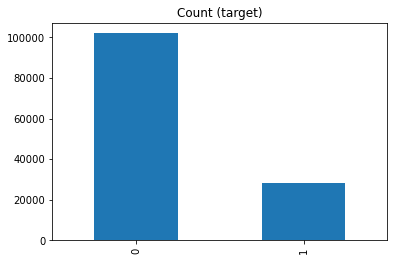

In [17]:
target_count.plot(kind='bar', title='Count (target)');

In [18]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.diabetes_mellitus==0]
df_minority = df[df.diabetes_mellitus==1]
 

### Under sampling/Down Sampling

In [19]:
# # Downsample majojrity class
# df_majority_downsampled = resample(df_majority, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=40000,    # to get a 40-60
#                                  random_state=123) # reproducible results
 
# # Combine majority class with upsampled minority class
# df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# # Display new class counts
# df_downsampled.diabetes_mellitus.value_counts()

In [20]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=.65, random_state=50, replacement=False) 
# sample without replacement
# sampling strategy =.65 allows for 40/60 balance of target variable
# corresponds to the desired ratio of the number of samples in the minority class 
# over the number of samples in the majority class after resampling
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# Check how many observations were removed -- looks like about 50,000
print(len(X_rus))
print(len(X_train))
print(len(y_rus))
print(len(y_train))

50154
91109
50154
91109


In [21]:
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_rus))

Resampled dataset shape Counter({0: 30396, 1: 19758})


### Over sampling/Up Sampling

In [22]:
# # Upsample minority class
# df_minority_upsampled = resample(df_minority, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=70000,    # to get a 40-60
#                                  random_state=123) # reproducible results
 
# # Combine majority class with upsampled minority class
# df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# # Display new class counts
# df_upsampled.diabetes_mellitus.value_counts()

In [23]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=.65, random_state=50)
# sampling strategy =.65 allows for 40/60 balance of target variable (40% - 0 and 60% - 1)
# sampling strategy corresponds to the desired ratio of the number of samples in the minority class 
# over the number of samples in the majority class after resampling. 
X_ros, y_ros = ros.fit_sample(X_train, y_train)

In [24]:
print(len(X_ros))
print(len(X_train))
print(len(y_ros))
print(len(y_train))

117729
91109
117729
91109


In [25]:
print('Resampled dataset shape %s' % Counter(y_ros))

Resampled dataset shape Counter({0: 71351, 1: 46378})
